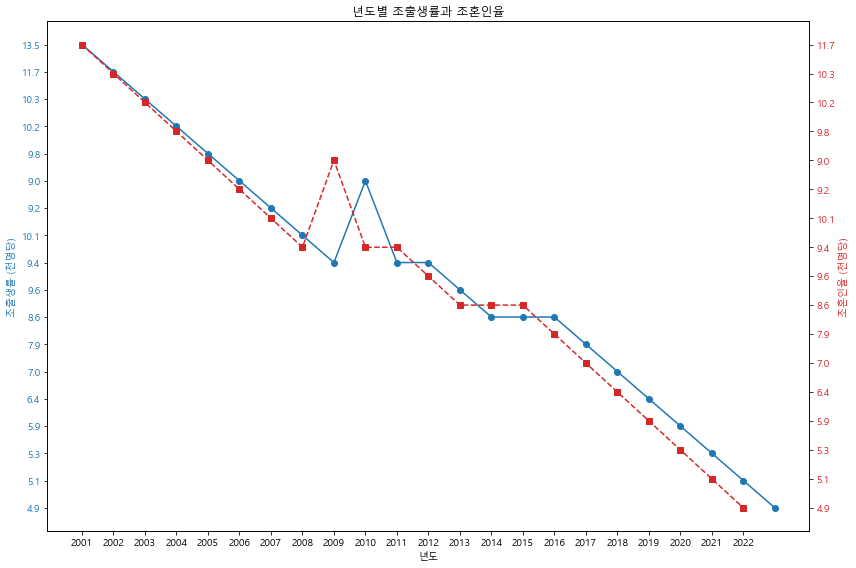

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트 파일 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일에서 데이터 읽어오기
file_path = "시도_인구동태건수_및_동태율_출생_사망_혼인_이혼__20231118231252.csv"  
df = pd.read_csv(file_path, encoding="euc-kr")

# 행정구역별 전국 데이터만 추출
df_nationwide = df[df["행정구역별"] == "전국"]

# 년도별 조출생률과 조혼인율 데이터 추출
years = [str(year) for year in range(2000, 2023, 1)]
birth_rates = df_nationwide[years].iloc[:, ::]  # 홀수 인덱스의 열을 선택 (조출생률)
marriage_rates = df_nationwide[years].iloc[:, 1::]  # 짝수 인덱스의 열을 선택 (조혼인율)

# 데이터를 행정구역별로 나열
birth_rates_melted = pd.melt(birth_rates, value_name="조출생률 (천명당)", var_name="년도")
marriage_rates_melted = pd.melt(marriage_rates, value_name="조혼인율 (천명당)", var_name="년도")

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 8))

# 년도별 조출생률 그래프
color = 'tab:blue'
ax1.set_xlabel('년도')
ax1.set_ylabel('조출생률 (천명당)', color=color)
ax1.plot(birth_rates_melted["년도"], birth_rates_melted["조출생률 (천명당)"], marker='o', linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 축 생성 (조혼인율)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('조혼인율 (천명당)', color=color)
ax2.plot(marriage_rates_melted["년도"], marriage_rates_melted["조혼인율 (천명당)"], marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)


# 양쪽 축 뒤집기
ax1.set_ylim(ax1.get_ylim()[::-1])
ax2.set_ylim(ax2.get_ylim()[::-1])

# 그래프 출력
plt.title("년도별 조출생률과 조혼인율")
fig.tight_layout()
plt.show()

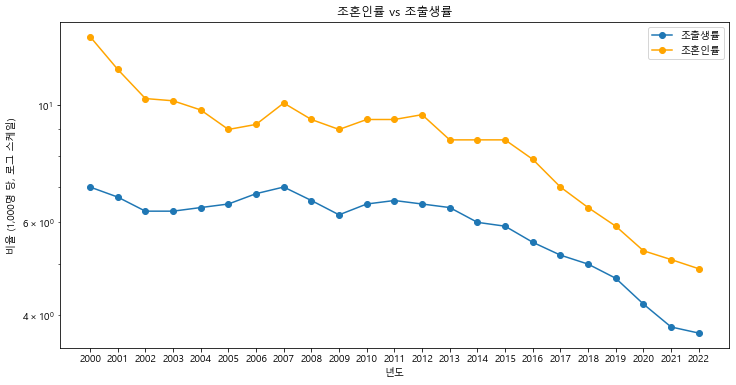

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용하고자 하는 한글 폰트 파일 경로로 변경
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# CSV 파일에서 데이터 읽어오기
file_path1 = "조혼인률.csv"
df1 = pd.read_csv(file_path1, encoding="euc-kr")  

file_path2 = "조출생률.csv"
df2 = pd.read_csv(file_path2, encoding="euc-kr")  

# 전국 데이터만 추출
df1_nation = df1[df1['행정구역별'] == '전국']
df2_nation = df2[df2['행정구역별'] == '전국']

# 년도별로 데이터 재구성
df1_nation = df1_nation.T[1:]
df2_nation = df2_nation.T[1:]

# 데이터 타입 변경
df1_nation = df1_nation.astype(float)
df2_nation = df2_nation.astype(float)

# 그래프 그리기 (로그 스케일)
plt.figure(figsize=(12, 6))

plt.plot(df1_nation.index, df1_nation[1], marker='o', label='조출생률')
plt.plot(df2_nation.index, df2_nation[1], marker='o', color='orange', label='조혼인률')

plt.yscale('log')  # Set y-axis to logarithmic scale

plt.title('조혼인률 vs 조출생률')
plt.xlabel('년도')
plt.ylabel('비율 (1,000명 당, 로그 스케일)')
plt.legend()

plt.show()


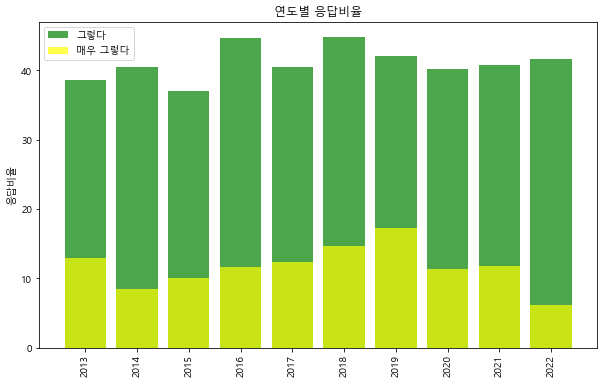

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
file_path1 = "우리_사회_갈등_정도_20231119010312.csv"
df1 = pd.read_csv(file_path1, encoding="euc-kr")

file_path2 = "우리_사회_갈등_정도_20231119014034.csv"
df2 = pd.read_csv(file_path2, encoding="euc-kr")

# 데이터 프레임을 전치하여 행과 열을 바꿔줍니다.
df1 = df1.set_index('구분별(1)').T
df2 = df2.set_index('구분별(1)').T

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 첫 번째 그래프 (그렇다) - 초록색
xs1 = df2['연령별'].index.values
ys1 = df2['연령별'].values.astype(float)
ax.bar(xs1, ys1, color='green', label='그렇다', alpha=0.7)

# 두 번째 그래프 (매우 그렇다) - 노란색
xs2 = df1['연령별'].index.values
ys2 = df1['연령별'].values.astype(float)
ax.bar(xs2, ys2, color='yellow', label='매우 그렇다', alpha=0.7)

# 축 및 레이블 설정
ax.set_ylabel('응답비율')
ax.set_title('연도별 응답비율')
plt.xticks(rotation=90)
ax.legend()

# 그래프 출력
plt.show()


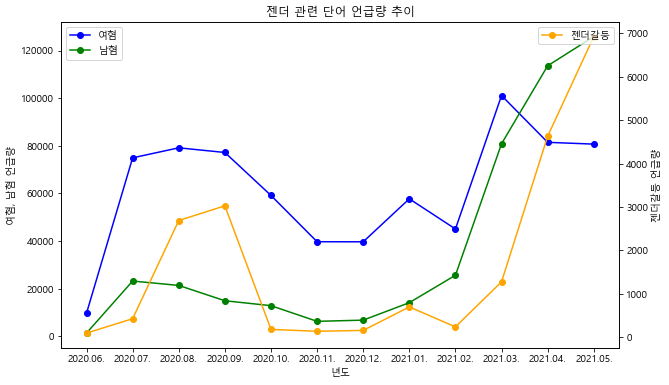

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
file_path1 = "젠더관련단어언급량.csv"
df = pd.read_csv(file_path1, encoding="euc-kr")

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(10, 6))

# 첫 번째 y축 (여혐, 남혐)
ax1.plot(df['년도'], df['여혐'], marker='o', label='여혐', color='blue')
ax1.plot(df['년도'], df['남혐'], marker='o', label='남혐', color='green')

# 두 번째 y축 (젠더갈등)
ax2 = ax1.twinx()
ax2.plot(df['년도'], df['젠더갈등'], color='orange', marker='o', label='젠더갈등')

# 그래프 제목과 축 라벨 설정
ax1.set_title('젠더 관련 단어 언급량 추이')
ax1.set_xlabel('년도')
ax1.set_ylabel('여혐, 남혐 언급량')
ax2.set_ylabel('젠더갈등 언급량')

# 범례 표시
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 그래프 표시
plt.show()


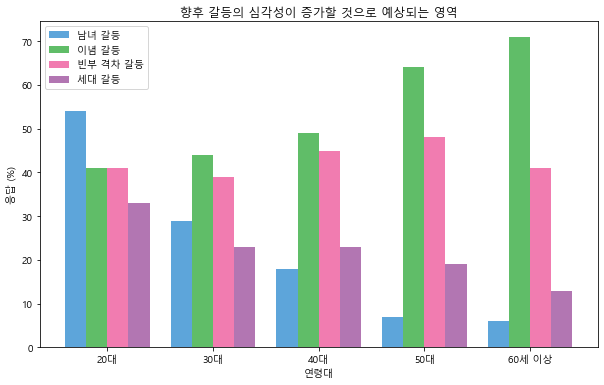

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일에서 데이터 읽어오기
file_path1 = "향후갈등.csv"
df = pd.read_csv(file_path1, encoding="euc-kr")

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 각 갈등별 연령대에 대한 막대 그래프 생성
bar_width = 0.2
bar_positions = np.arange(len(df['연령대']))

# 남녀갈등
ax.bar(bar_positions - 1.5 * bar_width, df['남녀갈등'], width=bar_width, label='남녀 갈등', color='#5DA5DA', align='center')

# 이념갈등
ax.bar(bar_positions - 0.5 * bar_width, df['이념갈등'], width=bar_width, label='이념 갈등', color='#60BD68', align='center')

# 빈부격차갈등
ax.bar(bar_positions + 0.5 * bar_width, df['빈부격차갈등'], width=bar_width, label='빈부 격차 갈등', color='#F17CB0', align='center')

# 세대갈등
ax.bar(bar_positions + 1.5 * bar_width, df['세대갈등'], width=bar_width, label='세대 갈등', color='#B276B2', align='center')

# X 축 레이블과 제목 설정
ax.set_xticks(bar_positions)
ax.set_xticklabels(df['연령대'])
ax.set_ylabel('응답 (%)')
ax.set_xlabel('연령대')
ax.set_title('향후 갈등의 심각성이 증가할 것으로 예상되는 영역')

# 범례 표시
ax.legend()

# 그래프 표시
plt.show()


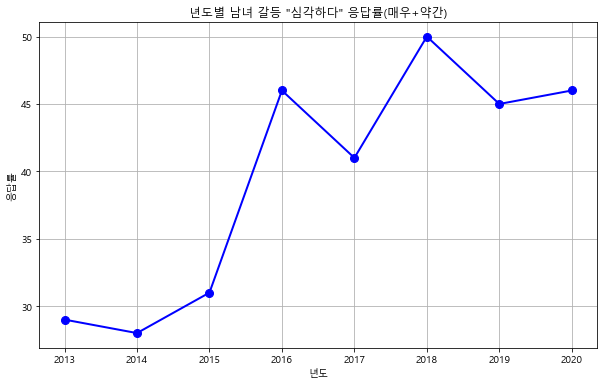

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
file_path1 = "응답률.csv"
df = pd.read_csv(file_path1, encoding="euc-kr")

# 그래프 설정
fig, ax = plt.subplots(figsize=(10, 6))

# 년도별 응답률 시각화
ax.plot(df['년도'], df['값'], marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

# 그래프 제목과 축 라벨 설정
ax.set_title('년도별 남녀 갈등 "심각하다" 응답률(매우+약간)')
ax.set_xlabel('년도')
ax.set_ylabel('응답률')

# 그래프 표시
plt.grid(True)
plt.show()


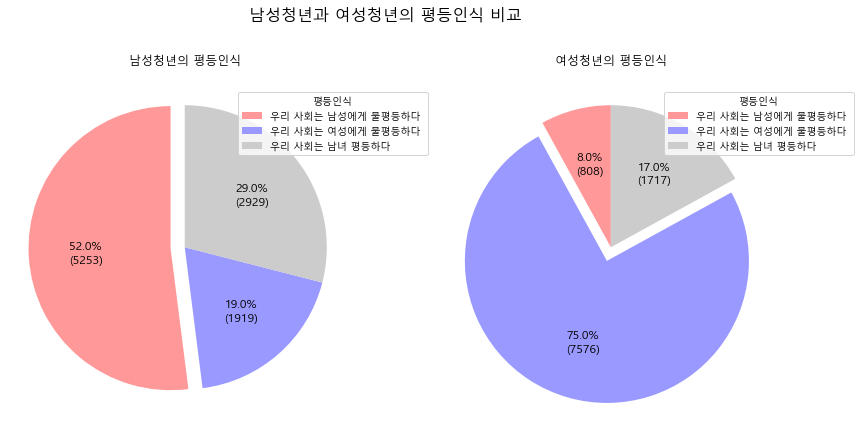

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 읽어오기
file_path1 = "평등인식.csv"
df = pd.read_csv(file_path1, encoding="euc-kr")

# '남성청년'과 '여성청년'의 값 추출
male_values = df[df['성별'] == '남성청년'].iloc[:, 1:].values.flatten()
female_values = df[df['성별'] == '여성청년'].iloc[:, 1:].values.flatten()

# 가장 큰 값의 인덱스 구하기
max_index_male = male_values.argmax()
max_index_female = female_values.argmax()

# 부드러운 색상 설정
colors = ['#ff9999', '#9999ff', '#cccccc']

# 그래프 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# 남성청년 파이차트
explode_male = [0.1 if i == max_index_male else 0 for i in range(len(male_values))]
male_pie = axes[0].pie(male_values, labels=None, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(male_values) / 100),
                       startangle=90, colors=colors, explode=explode_male, textprops={'fontsize': 12})
axes[0].set_title('남성청년의 평등인식')

# 여성청년 파이차트
explode_female = [0.1 if i == max_index_female else 0 for i in range(len(female_values))]
female_pie = axes[1].pie(female_values, labels=None, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(female_values) / 100),
                         startangle=90, colors=colors, explode=explode_female, textprops={'fontsize': 12})
axes[1].set_title('여성청년의 평등인식')

# Legend와 Title만 표시
fig.suptitle('남성청년과 여성청년의 평등인식 비교', fontsize=16)
axes[0].legend(male_pie[0], df.columns[1:], title='평등인식', bbox_to_anchor=(1.2, 0.95), loc='upper right')
axes[1].legend(female_pie[0], df.columns[1:], title='평등인식', bbox_to_anchor=(1.2, 0.95), loc='upper right')

# 그래프 표시
plt.show()


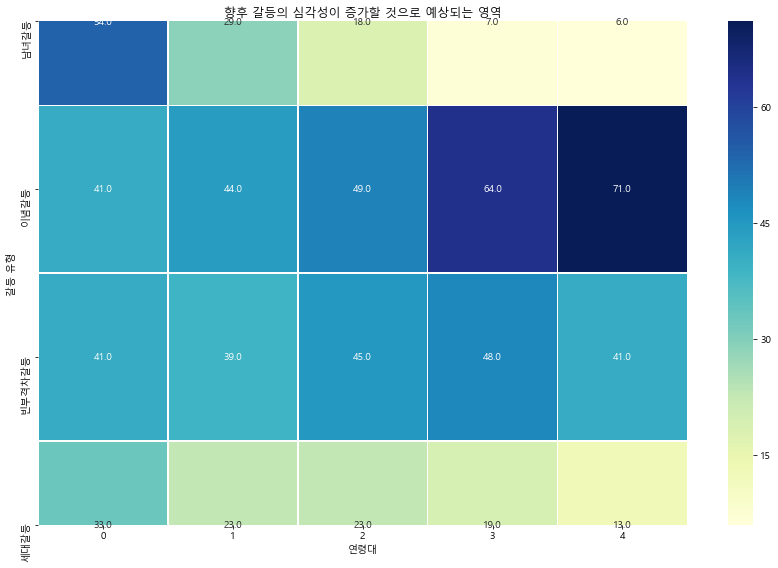

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일에서 데이터 읽어오기
file_path1 = "향후갈등.csv"
df = pd.read_csv(file_path1, encoding="euc-kr")

# 히트맵을 그릴 데이터 프레임 생성
heatmap_data = df[['남녀갈등', '이념갈등', '빈부격차갈등', '세대갈등']]

# 그림 크기 설정
plt.figure(figsize=(12, 8))

# 히트맵 그리기
ax = sns.heatmap(heatmap_data.T, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5, cbar=True)

# X 축과 Y 축 레이블 설정
ax.set_xlabel('연령대')
ax.set_ylabel('갈등 유형')
ax.set_title('향후 갈등의 심각성이 증가할 것으로 예상되는 영역')

# 레이아웃 최적화
plt.tight_layout()

# 그래프 표시
plt.show()
